# Import libraries 

In [1]:
%pip install fuzzywuzzy
import pandas as pd
import numpy as np
from fuzzywuzzy import process,fuzz
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


# Remove warnings

In [2]:
import warnings
warnings.simplefilter('ignore')

# figures size

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (16,6)
sns.set_style('darkgrid')

# Dataset

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df = pd.read_excel(r'Data_candyhierarchy2017.xlsx')
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

# Data Exploration

In [6]:
df.shape

(2460, 120)

In [7]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 120 columns):
 #    Column                                                                                 Non-Null Count  Dtype  
---   ------                                                                                 --------------  -----  
 0    Internal ID                                                                            2460 non-null   int64  
 1    Q1: GOING OUT?                                                                         2350 non-null   object 
 2    Q2: GENDER                                                                             2419 non-null   object 
 3    Q3: AGE                                                                                2376 non-null   object 
 4    Q4: COUNTRY                                                                            2396 non-null   object 
 5    Q5: STATE, PROVINCE, COUNTY, ETC                                   

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [10]:
df.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [11]:
#see how much missing data in eatch column (except Q6 -we will explore it in another data frame -)
df.isna().sum().head(6)/len(df)

Internal ID                         0.000000
Q1: GOING OUT?                      0.044715
Q2: GENDER                          0.016667
Q3: AGE                             0.034146
Q4: COUNTRY                         0.026016
Q5: STATE, PROVINCE, COUNTY, ETC    0.040650
dtype: float64

In [12]:
df.isna().sum().tail(12)/len(df)

Q6 | York Peppermint Patties    0.286585
Q7: JOY OTHER                   0.629675
Q8: DESPAIR OTHER               0.708537
Q9: OTHER COMMENTS              0.843089
Q10: DRESS                      0.302439
Unnamed: 113                    0.996341
Q11: DAY                        0.294715
Q12: MEDIA [Daily Dish]         0.965447
Q12: MEDIA [Science]            0.446341
Q12: MEDIA [ESPN]               0.959756
Q12: MEDIA [Yahoo]              0.972764
Click Coordinates (x, y)        0.347561
dtype: float64

drop useless columns

In [13]:
 df.drop(['Internal ID','Unnamed: 113','Click Coordinates (x, y)','Q9: OTHER COMMENTS','Q8: DESPAIR OTHER','Q7: JOY OTHER'],axis = 1 , inplace = True)


# Cleaning

cleaning the first column (Q1: GOING OUT?)


<function matplotlib.pyplot.show(close=None, block=None)>

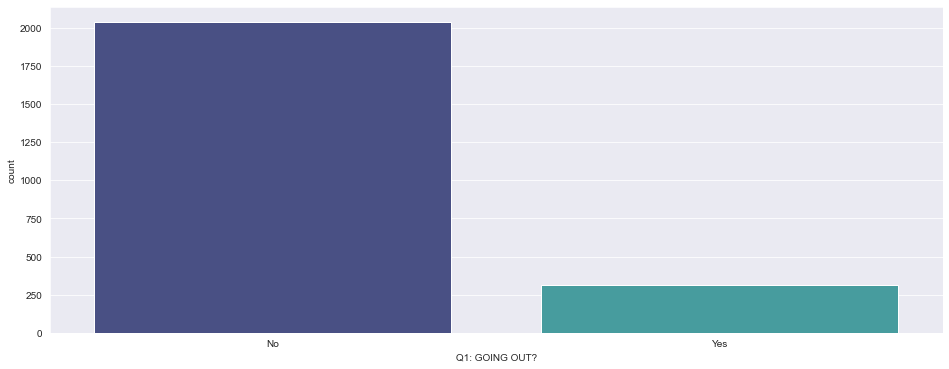

In [14]:
#Before cleaning
sns.countplot(x = 'Q1: GOING OUT?' , data = df,order = df['Q1: GOING OUT?'].value_counts().index , palette = 'mako')
plt.show

In [15]:
df['Q1: GOING OUT?'].value_counts()

No     2038
Yes     312
Name: Q1: GOING OUT?, dtype: int64

In [16]:
#replace the null values with "maybe" as it could be yes or no
df['Q1: GOING OUT?'].fillna('maybe' , inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

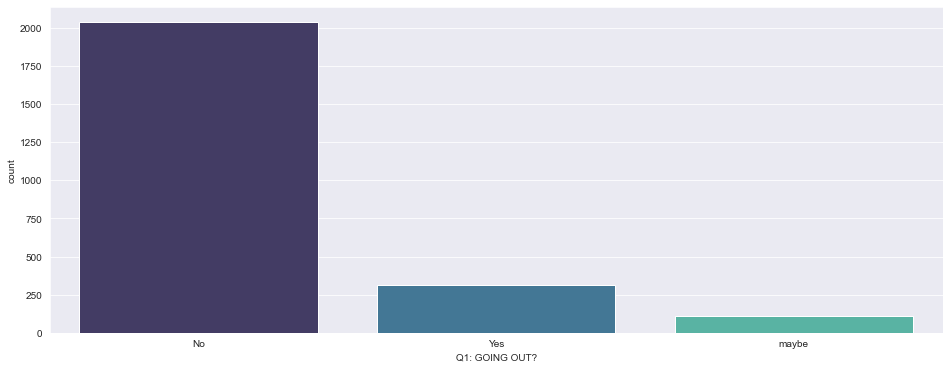

In [17]:
#After cleaning
sns.countplot(x = 'Q1: GOING OUT?' , data = df,order = df['Q1: GOING OUT?'].value_counts().index , palette = 'mako')
plt.show

In [18]:
df['Q1: GOING OUT?'].value_counts()

No       2038
Yes       312
maybe     110
Name: Q1: GOING OUT?, dtype: int64

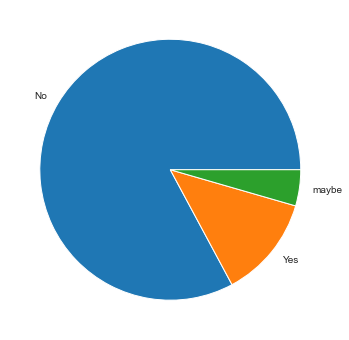

In [19]:
plt.pie(df['Q1: GOING OUT?'].value_counts(), labels =['No','Yes','maybe'])
plt.show()

cleaning the 2nd column (Q2: GENDER)

<function matplotlib.pyplot.show(close=None, block=None)>

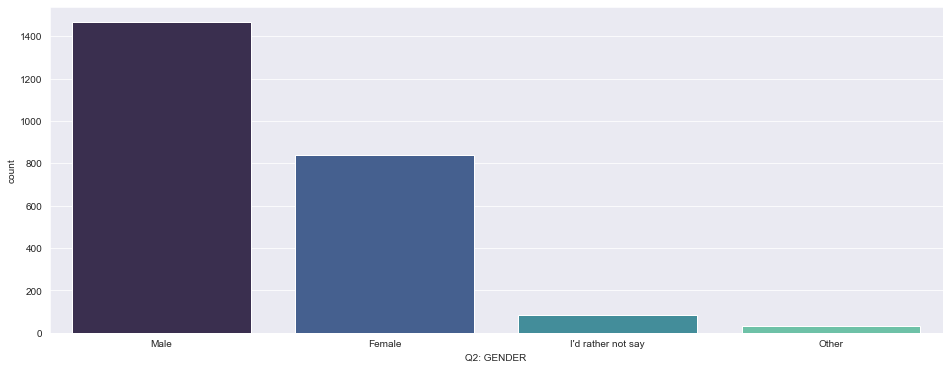

In [20]:
#Before
sns.countplot(x = 'Q2: GENDER' , data = df,order = df['Q2: GENDER'].value_counts().index , palette = 'mako')
plt.show

In [21]:
df['Q2: GENDER'].value_counts()

Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: Q2: GENDER, dtype: int64

In [22]:
# fill na values with "i'd rather not to say"
df['Q2: GENDER'].fillna("I'd rather not say" , inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

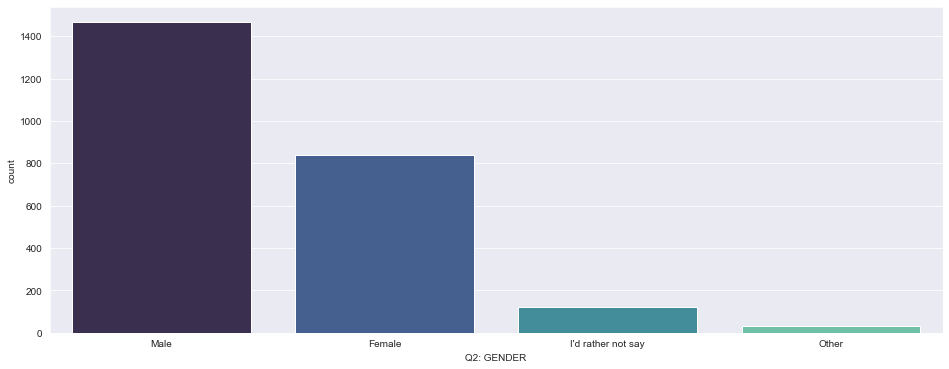

In [23]:
#after
sns.countplot(x = 'Q2: GENDER' , data = df, order = df['Q2: GENDER'].value_counts().index , palette = 'mako')
plt.show

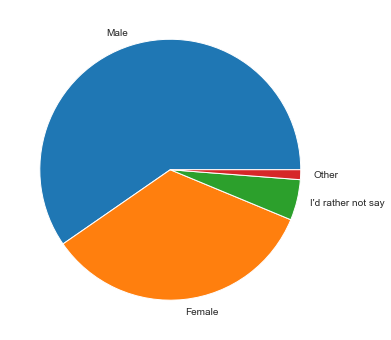

In [24]:
plt.pie(df['Q2: GENDER'].value_counts(), labels =['Male','Female',"I'd rather not say",'Other'])
plt.show()

cleaning the 3rd column (Q3: AGE)

In [25]:
#converting the data in this colum to numerical and replace string with null
df['Q3: AGE'] = pd.to_numeric(df['Q3: AGE'], errors='coerce')

In [26]:
df['Q3: AGE'].describe()

count    2352.000000
mean       42.617304
std        23.846531
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: Q3: AGE, dtype: float64

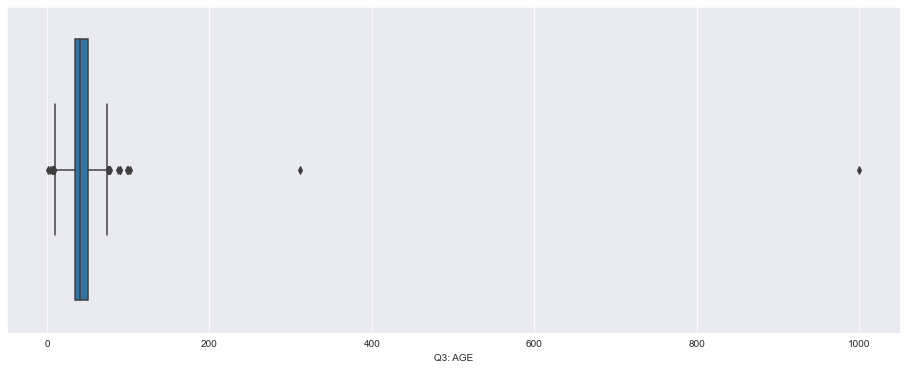

In [27]:
#boxplot to show outliers
sns.boxplot( x = 'Q3: AGE' , data = df)
plt.show()

In [28]:
# it seems that there is irrational values so i will replace what is more 75 or less than 12 with the median
df['Q3: AGE'][df['Q3: AGE']>75] = df['Q3: AGE'].median()
df['Q3: AGE'][df['Q3: AGE']<12] = df['Q3: AGE'].median()
df['Q3: AGE'].fillna(df['Q3: AGE'].mean(),inplace = True)

In [29]:
df['Q3: AGE'].describe()

count    2460.000000
mean       42.189583
std        11.020010
min        12.000000
25%        35.000000
50%        42.000000
75%        49.000000
max        75.000000
Name: Q3: AGE, dtype: float64

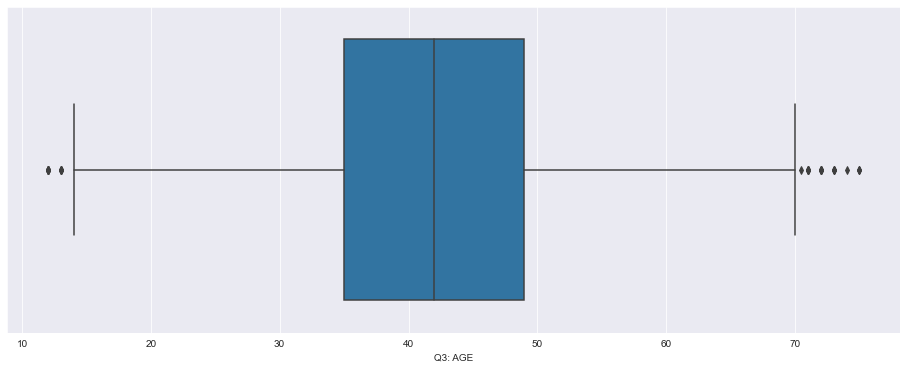

In [30]:
#to see the changes
sns.boxplot( x = 'Q3: AGE' , data = df)
plt.show()

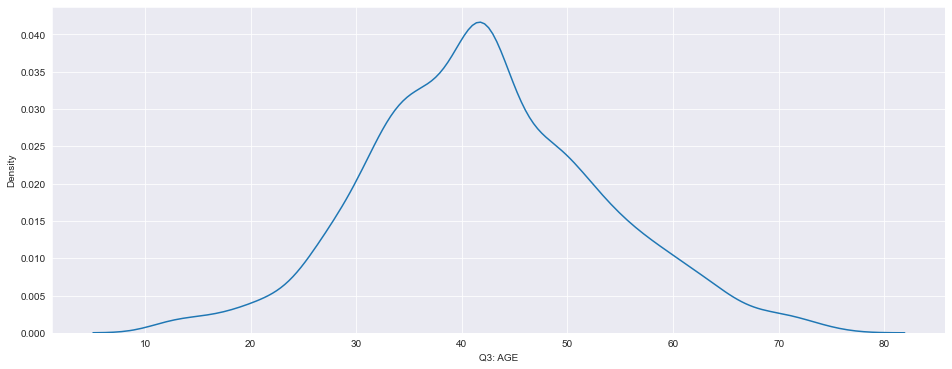

In [31]:
sns.kdeplot(x='Q3: AGE' , data = df)
plt.show()

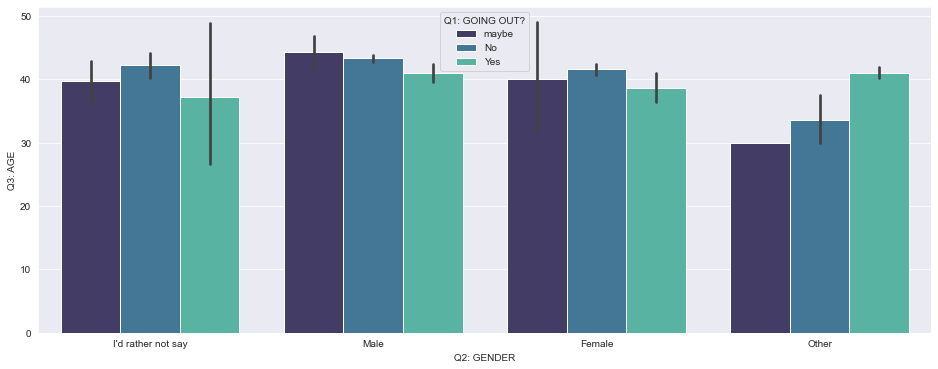

In [32]:
sns.barplot(data=df,x="Q2: GENDER",y="Q3: AGE",hue="Q1: GOING OUT?",palette = 'mako')
plt.show()

cleaning country column

In [33]:
df['Q4: COUNTRY'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [34]:
df['Q4: COUNTRY'].value_counts(dropna = False).sort_values(ascending = False)

USA                     699
United States           497
usa                     217
Canada                  179
Usa                     139
                       ... 
United kingdom            1
USA USA USA!!!!           1
I don't know anymore      1
France                    1
Fear and Loathing         1
Name: Q4: COUNTRY, Length: 129, dtype: int64

In [35]:
df['Q4: COUNTRY'].isna().sum()/len(df)

0.026016260162601626

<function matplotlib.pyplot.show(close=None, block=None)>

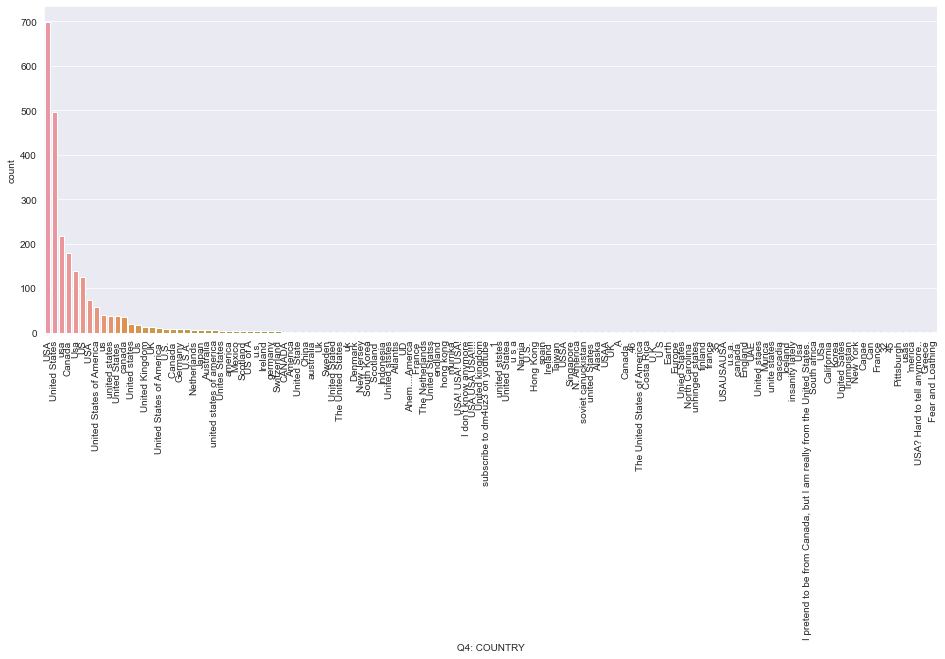

In [36]:
sns.countplot(x = 'Q4: COUNTRY' , data = df,order = df['Q4: COUNTRY'].value_counts().index )
plt.xticks(rotation = 90)
plt.show

In [37]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip().str.lower()
df['Q4: COUNTRY'].unique()

array([nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new jersey',

In [38]:
countries = pd.Series(['usa','u.s.a' ,'united states','america','china','uk','united kingdom','England'])

for country in countries:
    matches = process.extract(country, df['Q4: COUNTRY'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Q4: COUNTRY'] == potential_match[0], 'Q4: COUNTRY'] = country
            
df['Q4: COUNTRY'].unique()

array([nan, 'usa', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'uae', 'England', 'mexico', 'u.s.a', 'america',
       'france', 'finland', 'us of a', 'north carolina', 'netherlands',
       'germany', 'europe', 'earth', 'costa rica', 'cascadia',
       'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'can', 'canae',
       'new york', 'trumpistan', 'ireland', 'korea', 'california',
       'japan', 'south africa', 'iceland', 'canada`', 'scotland',
       'denmark', 'switzerland', 'ud', 'south korea', 'new jersey',
       'indonesia', 'the netherlands', 'atlantis', 'murrika', 'alaska',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong',
       'spain', 'sweden', 'narnia', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [39]:
usa_mapping = {'united states':'usa','america':'usa','u.s.a':'usa','us of a':'usa'}
uk_mapping = {'united kingdom':'uk','England':'uk'}
df['Q4: COUNTRY'].replace(usa_mapping,inplace=True)
df['Q4: COUNTRY'].replace(uk_mapping,inplace=True)

In [40]:
df['Q4: COUNTRY'].unique()

array([nan, 'usa', 'canada', 'murica', 'uk', 'uae', 'mexico', 'france',
       'finland', 'north carolina', 'netherlands', 'germany', 'europe',
       'earth', 'costa rica', 'cascadia', 'australia', 'insanity lately',
       'greece', 'usa? hard to tell anymore..', 'pittsburgh', 'can',
       'canae', 'new york', 'trumpistan', 'ireland', 'korea',
       'california', 'japan', 'south africa', 'iceland', 'canada`',
       'scotland', 'denmark', 'switzerland', 'ud', 'south korea',
       'new jersey', 'indonesia', 'the netherlands', 'atlantis',
       'murrika', 'alaska', 'soviet canuckistan', 'singapore', 'china',
       'taiwan', 'hong kong', 'spain', 'sweden', 'narnia',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [41]:
mapping = {np.nan:'other','murica':'other','north carolina':'other','europe':'other','earth':'other',
        'cascadia':'other','insanity lately':'other','usa? hard to tell anymore..':'other',
       'pittsburgh':'other','can':'other','canae':'other','new york':'other',
        'trumpistan':'other', 'ireland':'other','california':'other','canada`':'canada','ud':'other',
        'south korea':'korea','new jersey':'other','the netherlands':'netherlands','atlantis':'other',
        'murrika':'other', 'alaska':'other', 'soviet canuckistan':'other' ,'narnia':'other',
        'subscribe to dm4uz3 on youtube':'other', "i don't know anymore":'other','fear and loathing':'other'}
df['Q4: COUNTRY'].replace(mapping,inplace=True)

In [42]:
df['Q4: COUNTRY'].value_counts()

usa             2041
canada           225
other             96
uk                34
germany           10
netherlands        7
australia          7
scotland           5
japan              5
mexico             4
france             3
switzerland        3
hong kong          2
china              2
denmark            2
korea              2
sweden             2
iceland            1
south africa       1
greece             1
costa rica         1
indonesia          1
singapore          1
finland            1
taiwan             1
uae                1
spain              1
Name: Q4: COUNTRY, dtype: int64

In [43]:
mapping_2 = {'spain':'other','uae':'other','taiwan':'other','finland':'other','singapore':'other','indonesia':'other',
             'costa rica':'other','greece':'other','south africa':'other','iceland':'other','sweden':'other',
             'korea':'other','denmark':'other','china':'other','hong kong':'other','switzerland':'other'
            ,'france':'other','mexico':'other','japan':'other','scotland':'other'}
df['Q4: COUNTRY'].replace(mapping_2,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

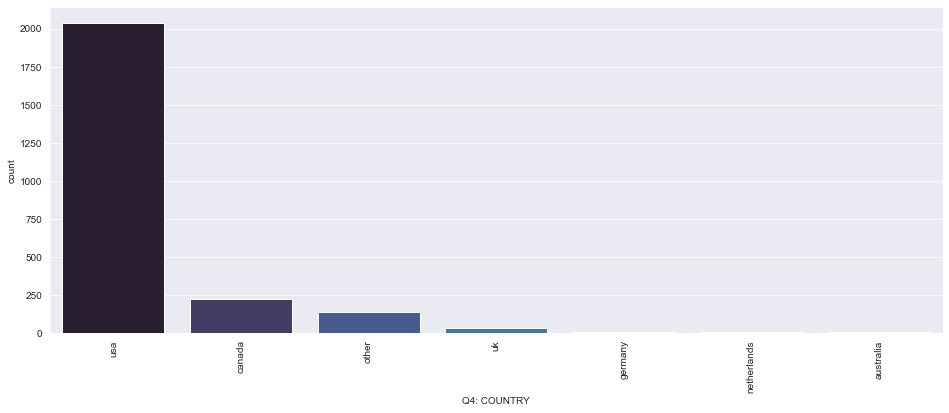

In [44]:
sns.countplot(x = 'Q4: COUNTRY' , data = df  ,order = df['Q4: COUNTRY'].value_counts().index ,palette = 'mako')
plt.xticks(rotation = 90)
plt.show

In [45]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].nunique()

511

In [46]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.strip().str.lower()

In [47]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].unique()

array([nan, 'nm', 'virginia', 'or', 'exton pa', 'colorado', 'ontario',
       'wa', 'quebec', 'ny', 'california', 'texas', 'new york', 'co',
       'in', 'mn', 'aberdeenshire', 'alberta', 'wisconsin, 53705', 'ri',
       'nc', 'scotland', 'minnesota', 'michigan', 'florida', 'new jersey',
       'va', 'los angeles, california', 'ca', 'chicago, illinois', 'nj',
       'wisconsin', 'london', 'illinois', 'district of columbia',
       'washington', 'massachusetts', 'montana', 'abu dhabi', 'tx',
       'arizona', 'dc', 'yukon', 'pennsylvania', 'md', 'ohio',
       'oxfordshire', 'iowa', 'tn', 'bc', 'maryland', 'mi', 'alaska',
       'colorado, jefferson county', 'louisiana', 'pa',
       'co, larimer county', 'nebraska', 'oregon', 'ut', 'cdmx',
       'north carolina', 'tennessee', 'knox county, tennessee',
       'new mexico', 'maine', 'virginia, arlington', 'mo', 'ma',
       'new york, ny', 'il', 'new hampshire', 'georgia',
       'washington, clark', 'ne', 'oklahoma', 'sc', 'nevada',
  

In [48]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].isna().sum()/len(df)

0.041463414634146344

<function matplotlib.pyplot.show(close=None, block=None)>

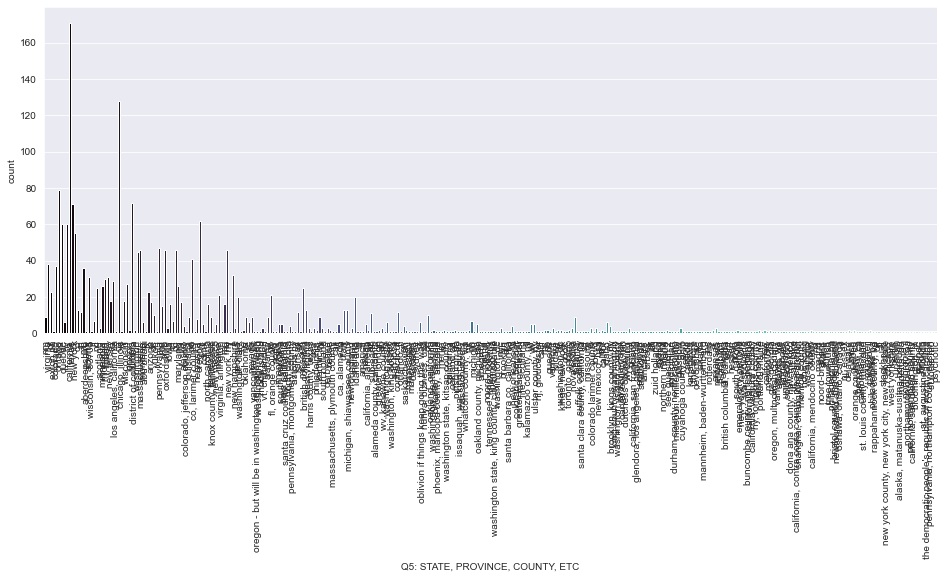

In [49]:
sns.countplot(x = 'Q5: STATE, PROVINCE, COUNTY, ETC' , data = df ,palette = 'mako')
plt.xticks(rotation = 90)
plt.show

In [50]:
#it is too messy and complex so i will just drop it xD
df.drop(columns=['Q5: STATE, PROVINCE, COUNTY, ETC'], inplace=True)

# clean candy

In [51]:
Q6 = df.loc[:,[x for x in df.columns if 'Q6' in x]].copy()
Q6.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH

fill na with random choice of the original three

In [52]:
Q6.fillna('MEH',inplace = True)

make the values numirecal to compute wich candy is better and wich is worse

In [53]:
Q6.replace({'MEH': 0,'JOY': 1,'DESPAIR': -1},inplace = True)
Q6.sum().sort_values(ascending = False)

Q6 | Any full-sized candy bar                              1542
Q6 | Reese’s Peanut Butter Cups                            1403
Q6 | Kit Kat                                               1395
Q6 | Cash, or other forms of legal tender                  1374
Q6 | Twix                                                  1342
                                                           ... 
Q6 | Dental paraphenalia                                  -1342
Q6 | Real Housewives of Orange County Season 9 Blue-Ray   -1389
Q6 | White Bread                                          -1411
Q6 | Gum from baseball cards                              -1418
Q6 | Broken glow stick                                    -1601
Length: 103, dtype: int64

make a new data frame with the candy name and the candy score

In [54]:
candy_list = Q6.columns.values.tolist()
candy_score = Q6.sum().tolist()
candy_taple = zip(candy_list,candy_score)
candy_df = pd.DataFrame(candy_taple , columns = ['candy name','candy score'])
candy_df.sort_values('candy score', ascending = False , inplace = True)
candy_df['candy name']=candy_df['candy name'].apply(lambda z : z.strip('Q6 | '))
candy_df.reset_index(drop = True,inplace = True)
candy_df

,candy name,candy score
0,Any full-sized candy bar,1542
1,Reese’s Peanut Butter Cups,1403
2,Kit Kat,1395
3,"Cash, or other forms of legal tender",1374
4,Twix,1342
...,...,...
98,Dental paraphenalia,-1342
99,Real Housewives of Orange County Season 9 Blue...,-1389
100,White Bread,-1411
101,Gum from baseball cards,-1418


The top 10 candies

In [55]:
best_10 = candy_df.iloc[0:10]
best_10

,candy name,candy score
0,Any full-sized candy bar,1542
1,Reese’s Peanut Butter Cups,1403
2,Kit Kat,1395
3,"Cash, or other forms of legal tender",1374
4,Twix,1342
5,Snickers,1320
6,Tolberone something or other,1236
7,Lindt Truffle,1179
8,Peanut M&M’s,1170
9,Nestle Crunch,1086


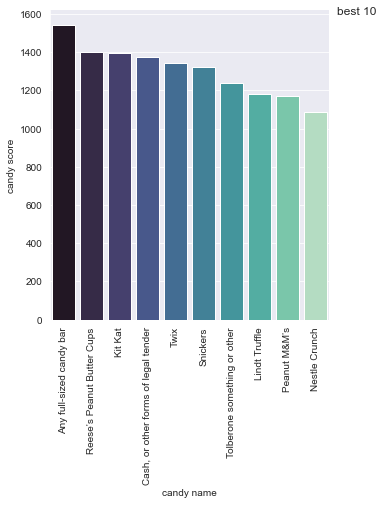

In [56]:
#best 10 candies
p = sns.catplot(x ='candy name' , y = 'candy score', data = best_10 ,kind = 'bar',palette = 'mako' )
p.fig.suptitle('best 10', x= 1)
plt.xticks(rotation = 90)
plt.show()

the worst 10 candies

In [57]:
#worst 10 candies
worst_10 = candy_df.iloc[103:92:-1]
worst_10

,candy name,candy score
102,Broken glow stick,-1601
101,Gum from baseball cards,-1418
100,White Bread,-1411
99,Real Housewives of Orange County Season 9 Blue...,-1389
98,Dental paraphenalia,-1342
97,Kale smoothie,-1327
96,Candy that is clearly just the stuff given out...,-1286
95,Whole Wheat anything,-1172
94,Creepy Religious comics/Chick Tracts,-1160
93,Those odd marshmallow circus peanut things,-1063


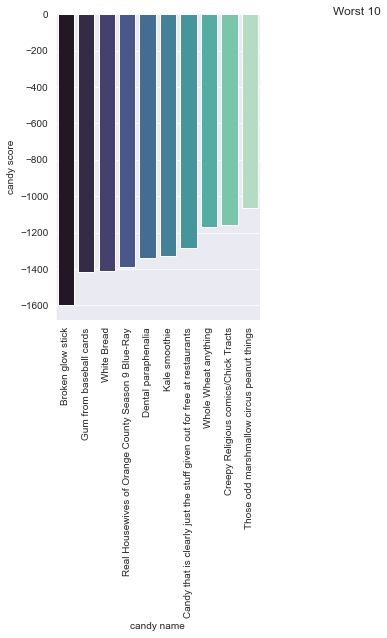

In [75]:
p = sns.catplot(y ='candy score' , x = 'candy name', data = worst_10 ,kind = 'bar',palette = 'mako' )
p.fig.suptitle('Worst 10', x= 1)
plt.xticks(rotation = 90)
plt.show()

In [59]:
#see the sum of null values to complete cleaning
df.isna().sum().tail(6) / len(df)

Q10: DRESS                 0.302439
Q11: DAY                   0.294715
Q12: MEDIA [Daily Dish]    0.965447
Q12: MEDIA [Science]       0.446341
Q12: MEDIA [ESPN]          0.959756
Q12: MEDIA [Yahoo]         0.972764
dtype: float64

cleaning Q10

In [60]:
df['Q10: DRESS'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [61]:
df['Q10: DRESS'].value_counts()

White and gold    1081
Blue and black     635
Name: Q10: DRESS, dtype: int64

In [62]:
#i will replace the null values with the mode
df['Q10: DRESS'].fillna(df['Q10: DRESS'].mode()[0],inplace = True )

In [63]:
df['Q10: DRESS'].value_counts()

White and gold    1825
Blue and black     635
Name: Q10: DRESS, dtype: int64

How does people see the dress

<function matplotlib.pyplot.show(close=None, block=None)>

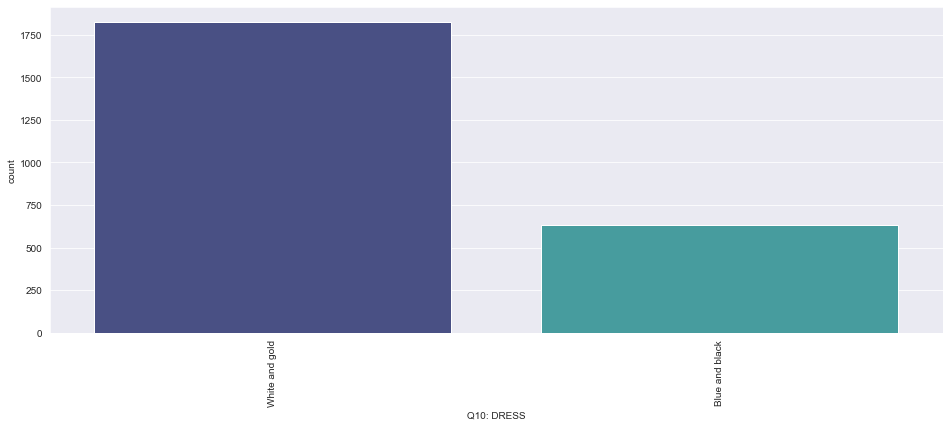

In [64]:
sns.countplot(x = 'Q10: DRESS' , data = df  ,order = df['Q10: DRESS'].value_counts().index ,palette = 'mako')
plt.xticks(rotation = 90)
plt.show

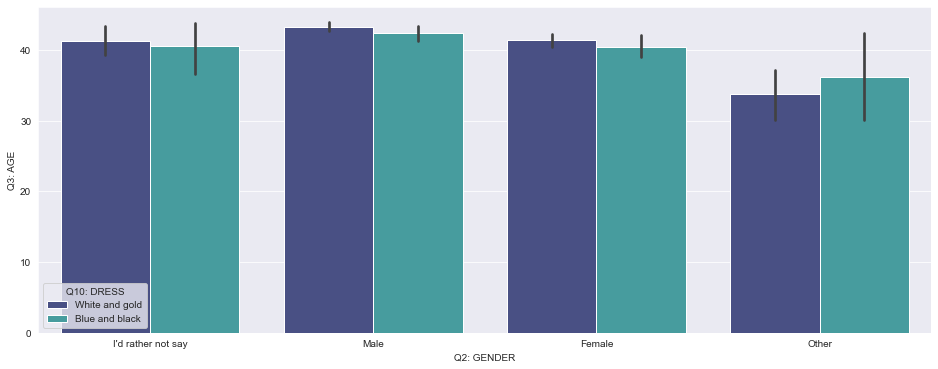

In [65]:
sns.barplot(data=df,x="Q2: GENDER",y="Q3: AGE",hue='Q10: DRESS',palette = 'mako')
plt.show()

cleaning Q11

In [66]:
df['Q11: DAY'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [67]:
# i will fill null values here with ('other days')
df['Q11: DAY'].fillna("other days",inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

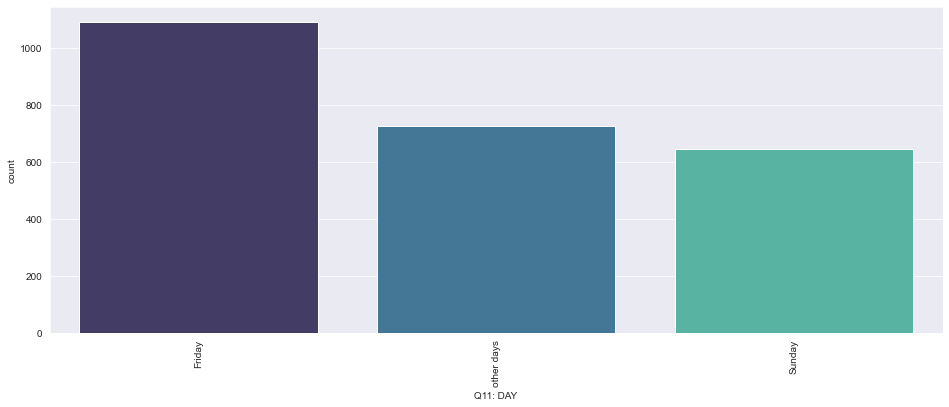

In [68]:
sns.countplot(x = 'Q11: DAY' , data = df  ,order = df['Q11: DAY'].value_counts().index,palette = 'mako' )
plt.xticks(rotation = 90)
plt.show

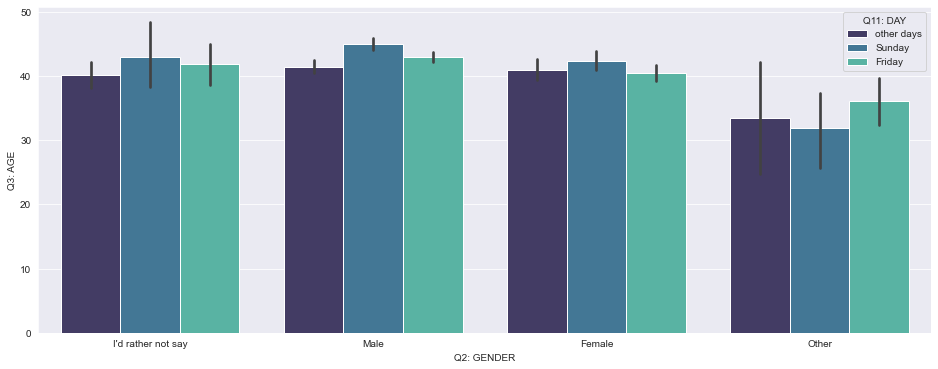

In [69]:
sns.barplot(data=df,x="Q2: GENDER",y="Q3: AGE",hue='Q11: DAY',palette = 'mako')
plt.show()

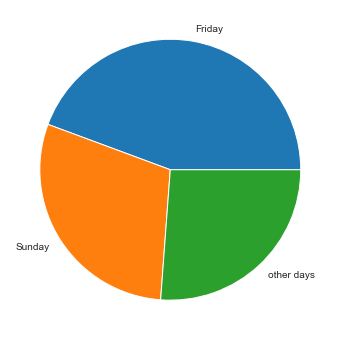

In [70]:
plt.pie(df['Q11: DAY'].value_counts(), labels =['Friday','Sunday','other days'])
plt.show()

make a new data frame for Q12

In [71]:
Q12 = df.loc[:,[x for x in df.columns if 'Q12' in x]].copy()
Q12.head()

,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN
4,NaN,1.0,NaN,NaN


In [72]:
Q12.sum()

Q12: MEDIA [Daily Dish]      85.0
Q12: MEDIA [Science]       1362.0
Q12: MEDIA [ESPN]            99.0
Q12: MEDIA [Yahoo]           67.0
dtype: float64

to see the score of eatch media i will make a new data frame with the media name and media score

In [73]:
media_list = Q12.columns.values.tolist()
media_score = Q12.sum().tolist()
media_taple = zip(media_list,media_score)
media_df = pd.DataFrame(media_taple , columns = ['media name','media score'])
media_df.sort_values('media score', ascending = False , inplace = True)
media_df['media name']=media_df['media name'].apply(lambda z : z.split('A')[1].strip(' []'))
media_df.reset_index(drop = True,inplace = True)
media_df

,media name,media score
0,Science,1362.0
1,ESPN,99.0
2,Daily Dish,85.0
3,Yahoo,67.0


pie plot to visualize answer the qistion ("what would most of people choose to enter?")

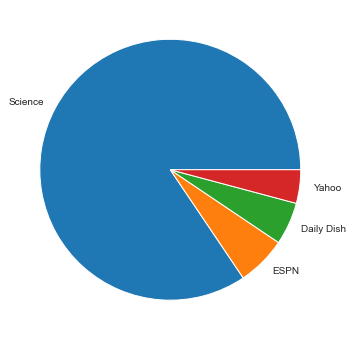

In [74]:
plt.pie(media_df['media score'], labels = media_df['media name'])
plt.show()

# summary

I cleaned the data so there will be no more missing values or duplicates,
also i showed up the most and the least loved candy ,
The most preferred day , how do most of people see the dress and what media site people would prefer to enter

and there is more like :
most people who made this survey are male
most people  are not going trick or treating 
the average age for those who take the survey is 42 years old
most of people who done this survey are from USA